In [1]:
import pandas as pd
df=pd.read_csv("dbscan.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Income    95 non-null     int64
 1   Age       95 non-null     int64
 2   Location  95 non-null     int32
 3   Cluster   95 non-null     int64
dtypes: int32(1), int64(3)
memory usage: 2.7 KB


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

In [3]:
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

# Select features for clustering
X = df[['Income', 'Age', 'Location']]

# Run DBSCAN clustering
db = DBSCAN(eps=30000, min_samples=5).fit(X)

# Add the cluster labels to the data
df['Cluster'] = db.labels_

# Display the resulting clusters
print(df[['Income', 'Age', 'Location', 'Cluster']])

    Income  Age  Location  Cluster
0    25000   22         0        0
1    27000   24         1        0
2    32000   29         0        0
3    45000   35         2        0
4    48000   40         1        0
..     ...  ...       ...      ...
90  530000  130         0        1
91  540000  132         1        1
92  550000  134         2        1
93  560000  136         3        1
94  570000  138         4        1

[95 rows x 4 columns]


In [4]:
import matplotlib.pyplot as plt

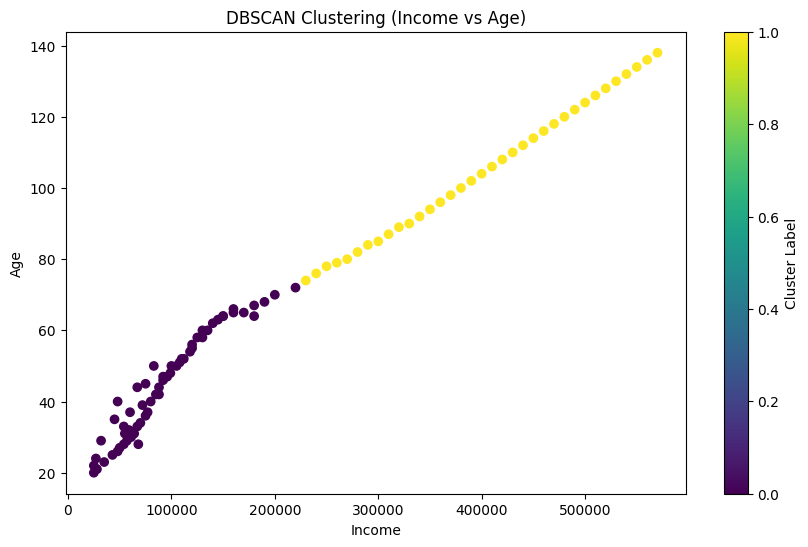

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Age'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering (Income vs Age)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.colorbar(label='Cluster Label')
plt.show()